In [1]:
import numpy as np
from scipy import constants as const
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
plt.rcParams['text.usetex'] = True

For a gas composed of a single atomic species, the Saha ionization equation is written as 

$\qquad\displaystyle \frac{n_{i+{\tiny{ 1}}}+n_e}{n_i} = \frac{2}{\lambda_{\tiny{\text{th}}}^3} \frac{g_{i+{\tiny 1}}}{g_i} \exp \left[ - \frac{\epsilon_{i+{\tiny 1}} - \epsilon_{i} } {k_{\tiny B} T} \right] $

where  :  

- $n_{\tiny i}$ is the **number density** of atoms in the *i-th* state of ionization (i.e., with $i$ electrons removed).  
- $g_{\tiny i}$ is the **degeneracy** of the $i$-ion state.  
- $\varepsilon_{\tiny i}$ is the **energy required** to remove $i$ electrons from a neutral atom, creating an $i$-level ion.  
- $n_{\small e}$ is the **electron density**.  
- $k_{\tiny B}$ is the **Boltzmann constant**.  
- $\lambda_{\tiny{\text{th}}}$ is the **thermal de Broglie wavelength** of an electron, defined as                                                                        
  $\qquad\displaystyle \lambda_{\tiny{\text{th}}} \; \stackrel{\mathrm{def}}{=} \;  \frac{h}{\sqrt{2 \pi m_{\small e} k_{\tiny B} T}}$                                                                        
- $m_{\small e}$ is the **mass of an electron**.  
- $T$ is the **temperature** of the gas.  
- $h$ is the **Planck constant**.


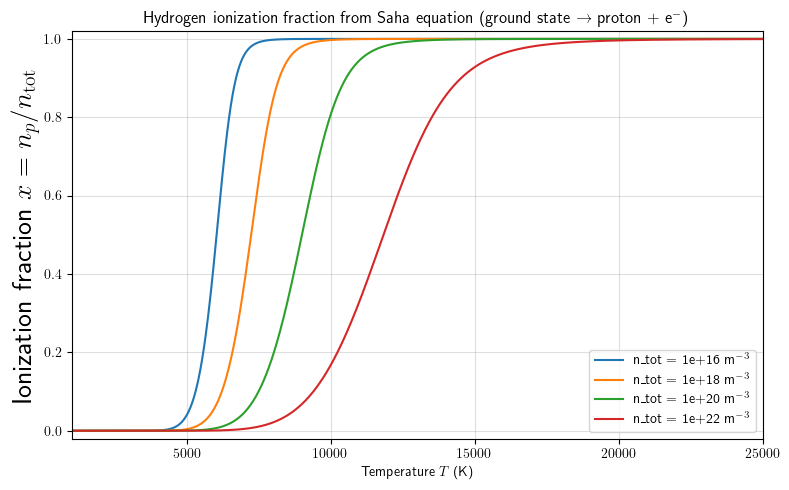

In [5]:
def lambda_th(T, h, m_e, k_B):
    return h / np.sqrt(2 * np.pi * m_e * k_B * T)

def saha_S(lambda_th, T, chi, k_B, g_ratio=0.5):
    lam = lambda_th(T, h, m_e, k_B)
    return (2.0 / lam**3) * g_ratio * np.exp(-chi / (k_B * T))

def ionization_fraction_from_S(S, n_tot):
    a =  1.0
    b =  S / n_tot
    c = -S / n_tot
    disc = b**2 - 4*a*c
    disc = np.maximum(disc, 0.0)
    root1 = (-b + np.sqrt(disc)) / (2*a)
    root2 = (-b - np.sqrt(disc)) / (2*a)
    
    for r in (root1, root2):
        if 0.0 <= r <= 1.0:
            return r
   
    return np.clip(root1, 0.0, 1.0)

k_B = const.Boltzmann    # J/K
h   = const.h            # Planck constant J*s
m_e = const.m_e          # electron mass kg
eV  = const.eV           # 1 eV in J

chi_eV = 13.59843449
chi    = chi_eV * eV     # in J

T = np.linspace(1000, 25000, 800)
n_totals = [1e16, 1e18, 1e20, 1e22]   

plt.figure(figsize=(8,5))
for n in n_totals:
    S_vals = saha_S(lambda_th, T, chi, k_B)
    x_vals = np.array([ionization_fraction_from_S(S, n) for S in S_vals])
    plt.plot(T, x_vals, label=f"n_tot = {n:.0e} m$^{{-3}}$")

plt.xlabel("Temperature $T$ (K)")
plt.ylabel("Ionization fraction $x = n_p / n_{\\rm tot}$", fontsize=20)
plt.title("Hydrogen ionization fraction from Saha equation (ground state → proton + e$^-$)")
plt.ylim(-0.02, 1.02)
plt.xlim(T.min(), T.max())
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()